<a href="https://colab.research.google.com/github/youngwiez/colab_python/blob/main/Raka_MPP_22Feb24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Time Series Analysis


---
Digunakan untuk melihat pergerakan/tren suatu data berdasarkan pola waktu. Visualisasi time series analysis ini menggunakan beberapa library, salah satunya library **Numpy**.

# Numpy Array
---
Suatu tabel yang biasanya berisi angka bertipe sama
dan diindeks dalam bentuk tuple.
Untuk Time Series Analysis, Numpy berfungsi untuk melakukan perhitungan matematika numerik dan menangani array multidimensi

# Cara membuat array Numpy

---
**1. Menggunakan function `numpy.empty`**

Function `numpy.empty` mengembalikan nilai pada array dengan random values

Contoh command: `numpy.empty(shape, dtype=float, order='C')`

Keterangan:
*   `shape` = jumlah baris
*   `dtype` = tipe datanya (default-nya bertipe float)
*   `order` = `C` / `C_contiguous` (data urut dari terbesar) atau `F` / `F_contiguous` (dari terkecil)

In [1]:
import numpy as np

b = np.empty(2, dtype = int)
print("Matrix b : \n", b)

a = np.empty([2, 2], dtype = int)
print("\nMatrix a : \n", a)

c = np.empty([3, 3])
print("\nMatrix c : \n", c)

Matrix b : 
 [-4611686018427387904      140733732257791]

Matrix a : 
 [[97217233818429              0]
 [             0              0]]

Matrix c : 
 [[4.80316951e-310 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000]]


**2. Menggunakan function `numpy.zeros`**

Function `numpy.zeros` mengembalikan nilai pada array dengan 0

Contoh command: `numpy.zeros(shape, dtype=None, order='C')`

In [16]:
"""
Cara lain membuat array Numpy bisa dengan function numpy.zeros
Function numpy.zeros mengembalikan nilai array dengan 0

Contoh command: numpy.zeros(shape, dtype=None, order='C')
"""
import numpy as np

b = np.zeros(2, dtype = int)
print("Matrix b : \n", b)

a = np.zeros([2, 2], dtype = int)
print("\nMatrix a : \n", a)

c = np.zeros([3, 3])
print("\nMatrix c : \n", c)

Matrix b : 
 [0 0]

Matrix a : 
 [[0 0]
 [0 0]]

Matrix c : 
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


# Contoh Penggunaan Numpy Array untuk Visualisasi Time Series Analysis


---

In [23]:
#import library yang diperlukan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

# membaca csv
df = pd.read_csv("stock_data.csv",
                 parse_dates=True,
                 index_col="Date")

# menampilkan 5 baris pertama dataset
df.head()

,Unnamed: 0,Open,High,Low,Close,Volume,Name
Date,,,,,,,
2006-01-03,NaN,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,NaN,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,NaN,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,NaN,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,NaN,43.10,43.66,42.82,43.42,16268338,AABA


In [24]:
# menghapus column yang tidak diperlukan
df.drop(columns='Unnamed: 0', inplace =True)
df.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA


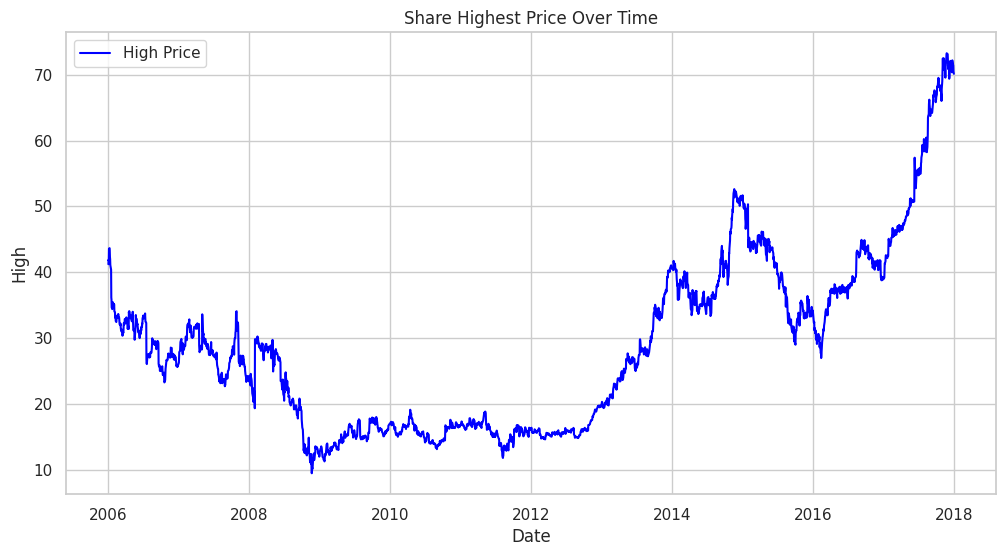

In [25]:
# Proses Plotting Data
sns.set(style="whitegrid")  # Setting style grafik menggunakan style whitegrid

plt.figure(figsize=(12, 6))  # Setting ukuran gambar
sns.lineplot(data=df, x='Date', y='High', label='High Price', color='blue')

# Memberi label dan judul
plt.xlabel('Date')
plt.ylabel('High')
plt.title('Share Highest Price Over Time')

plt.show()

<ipython-input-26-7a87fd557244>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample('M').mean()  # Resampling menjadi frekuensi data bulanan menggunakan mean


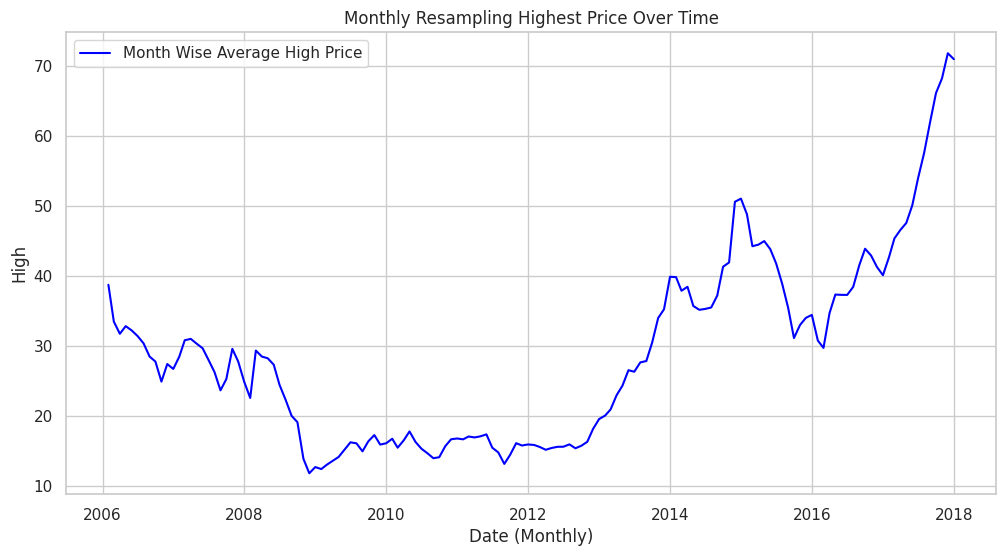

In [26]:
# Melakukan resampling untuk menyederhanakan tampilan, hanya mengambi data tiap bulannya
df_resampled = df.resample('M').mean()  # Resampling menjadi frekuensi data bulanan menggunakan mean

sns.set(style="whitegrid")  # Setting style grafik

# Plotting the 'high' column with seaborn, setting x as the resampled 'Date'
plt.figure(figsize=(12, 6))  # Setting ukuran gambar
sns.lineplot(data=df_resampled, x=df_resampled.index, y='High', label='Month Wise Average High Price', color='blue')

# Memberi label dan judul
plt.xlabel('Date (Monthly)')
plt.ylabel('High')
plt.title('Monthly Resampling Highest Price Over Time')

plt.show()